<h2> EDA overview </h2>

<h4> Part 1 </h4>

* Part 1 covers the years 2011–2012 <br>
* It focuses on the user behaviour in relation to time and weather condition <br>
* Obviously, we expect that the time time (e.g. day of week or hour of day) and the weather condition (e.g. sunny vs rainy) will affect how willing users are to rent a bike <br>
* Here we are particularly interested in the difference between registered and unregistered (casual) users

<h4> Part 2 </h4>

* Part 2 covers the years 2010–2019 <br>
* It focuses on the seasonality and trend in the number of rides over the years
* The business problem we are ultimately interested in is how to forecast the growth in users / rides in the future

<h2> Part 1: User Behaviour </h2>

In [78]:
# import matplotlib as mpl
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.ticker as ticker
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')

<h3> 1) Load wrangled data </h3> 

In [20]:
df_daily = pd.read_csv('cleaned_data/df_daily.csv')
df_hourly = pd.read_csv('cleaned_data/df_hourly.csv')

- Check dataframes

In [21]:
df_daily.head(2)

,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,app_temp_cat,year_month,calendar_week
0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5 to 15,2011-01,52
1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,5 to 15,2011-01,52


In [22]:
df_hourly.head(2)

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,app_temp_cat,year_month
0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,-5 to 5,2011-01
1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-5 to 5,2011-01


<h3> 2) Casual vs Registered Users per Time </h3>

<h4> 2.1) Casual vs Registered per Month </h4>

- Aggregate daily data to get mean number of "casual", "registered", and "total" users per month.

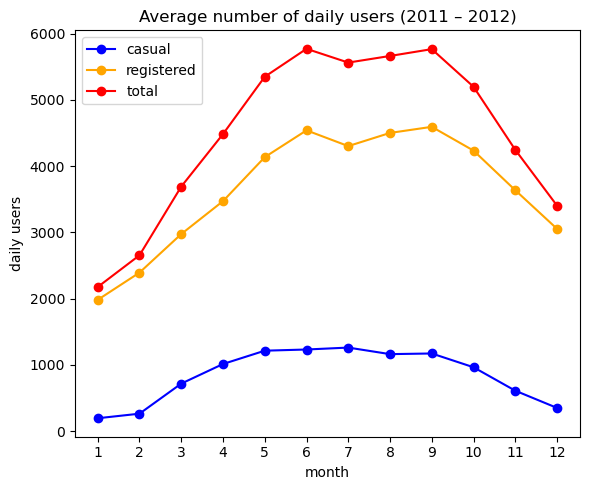

In [23]:
# mean no. users per month
users_per_month = df_daily.groupby('month').agg({'casual':'mean', 'registered':'mean', 'total':'mean'}).round().reindex(list(range(1,13)))

plt.figure(figsize = (6,5))
plt.title('Average number of daily users (2011 – 2012)')
plt.plot(users_per_month.index, users_per_month['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_month.index, users_per_month['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_month.index, users_per_month['total'], label = 'total', marker = 'o')
plt.xticks(ticks = users_per_month.index)
plt.xlabel ('month')
plt.ylabel ('daily users')
plt.legend()
plt.tight_layout()
plt.show()

- There are far more registered users than casual users. 
- Registered users make up the majority of all users. 
- As expected, numbers are higher during the warmer months.

<h4> 2.2) Casual vs Registered per Day of Week </h4>

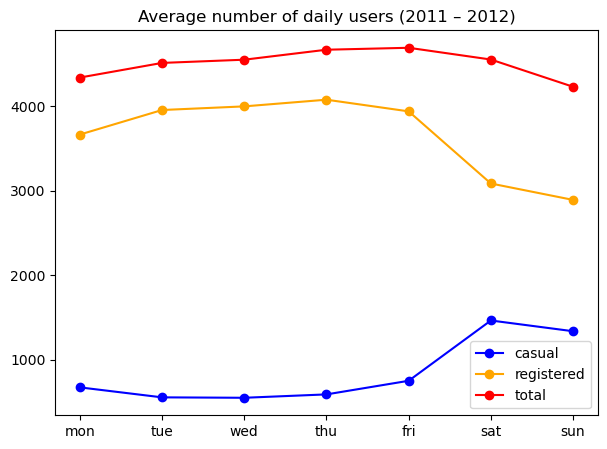

In [24]:
# users per day of week
users_per_DoW = df_daily.groupby('day_of_week').agg({'casual':'mean', 'registered':'mean', 'total':'mean'}).round()
users_per_DoW = users_per_DoW.reindex(['mon', 'tue', 'wed','thu', 'fri', 'sat', 'sun'])

plt.figure(figsize = (7,5))
plt.title('Average number of daily users (2011 – 2012)')
plt.plot(users_per_DoW.index, users_per_DoW['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['total'], label = 'total', marker = 'o')
plt.legend()
plt.show()

- Once again, we see that registered users make up vast majority of all users. 
- Interesting to note that registered users more active during the work week; casual users more active during weekends

<h4> 2.3) Casual vs Registered per Hour of Day </h4>

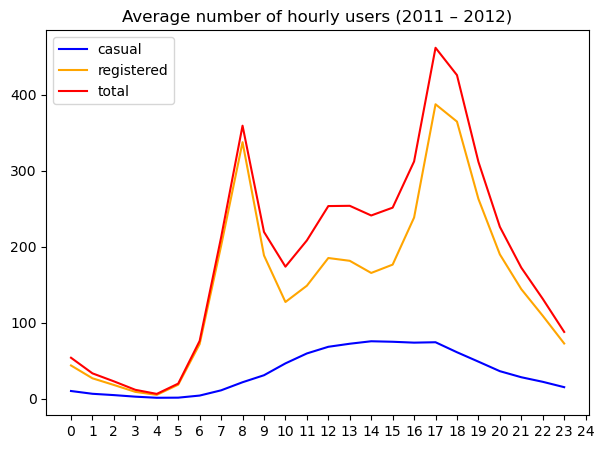

In [25]:
# Group by hour and retrieve "casual", "registered", and "total" users
temp_hourly_agg = df_hourly.groupby(['hour']).mean()[['casual', 'registered', 'total']].reset_index()

fig, ax = plt.subplots(figsize = (7,5))
ax.plot(temp_hourly_agg['hour'], temp_hourly_agg['casual'], label = 'casual')
ax.plot(temp_hourly_agg['hour'], temp_hourly_agg['registered'], label = 'registered')
ax.plot(temp_hourly_agg['hour'], temp_hourly_agg['total'], label = 'total')
ax.set_xticks(ticks = list(range(25)))
plt.title('Average number of hourly users (2011 – 2012)')
plt.legend()
plt.show()


- Interesting to note that the peak hours look very different between registered users and casual users.
- Registered users mostly ride around 8AM and 6 PM, corresponding with commuting hours. 
- We can surmise that registered users primarily use the service to get to and from work. 
- In contrast, casual users mostly ride during the afternoon hours, though the peak is far wider. 

<h3> 3) Number of users sorted by season and temperature </h3>

<h4> 3.1) Total users per day of week, per season </h4>

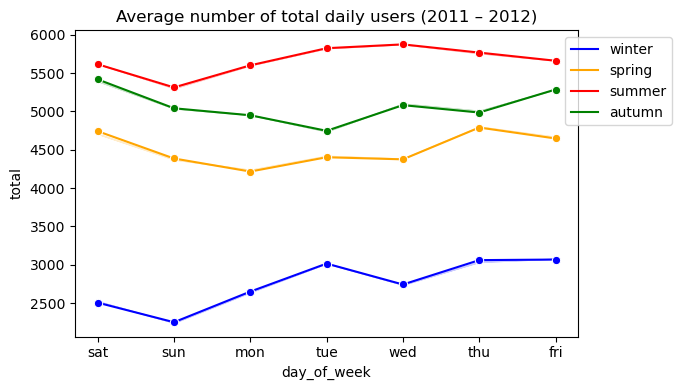

In [26]:
fig, ax = plt.subplots(figsize = (7,4))
colors = ['blue', 'orange', 'red', 'green']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(ax = ax, x = 'day_of_week', y = 'total', data = df_daily, 
                hue = 'season', err_style = 'band', ci = False, marker = 'o',)

plt.legend(loc='upper right', bbox_to_anchor = (1.2,1))
plt.title('Average number of total daily users (2011 – 2012)')
plt.tight_layout()
plt.show()

- As expected, higher overall number of rides in warmer seasons

<h3> 3.2) Average total users per hour, per season </h3>

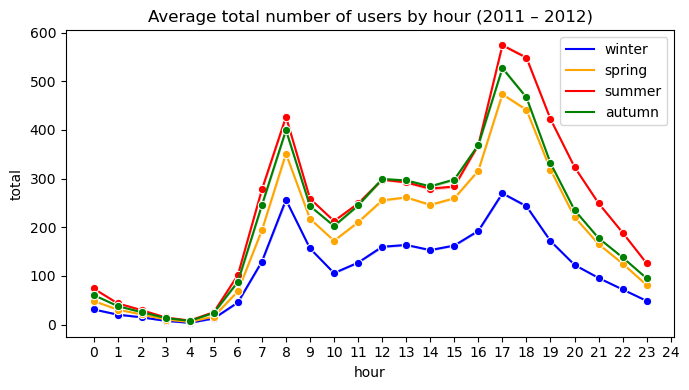

In [27]:
fig, ax = plt.subplots(figsize = (7,4))
colors = ['blue', 'orange', 'red', 'green']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(x = 'hour', y = 'total', data = df_hourly, hue = 'season', err_style = 'band', ci = 10, marker = 'o')
plt.legend(loc = 'upper right', bbox_to_anchor = (1,1))
plt.title('Average total number of users by hour (2011 – 2012)')
plt.xticks (ticks = range(0,25))
plt.tight_layout()
plt.show()


- Numbers are similar in spring, summer, autumn. There's a significant drop in winter.
- Evening peak lasts longer in summer (since evenings are longer / temps are higher).
- Number of users significantly lower in winter, but not by as much as I would've thought.

<h4> 3.3) Casual vs registered users per hour, per season </h4>

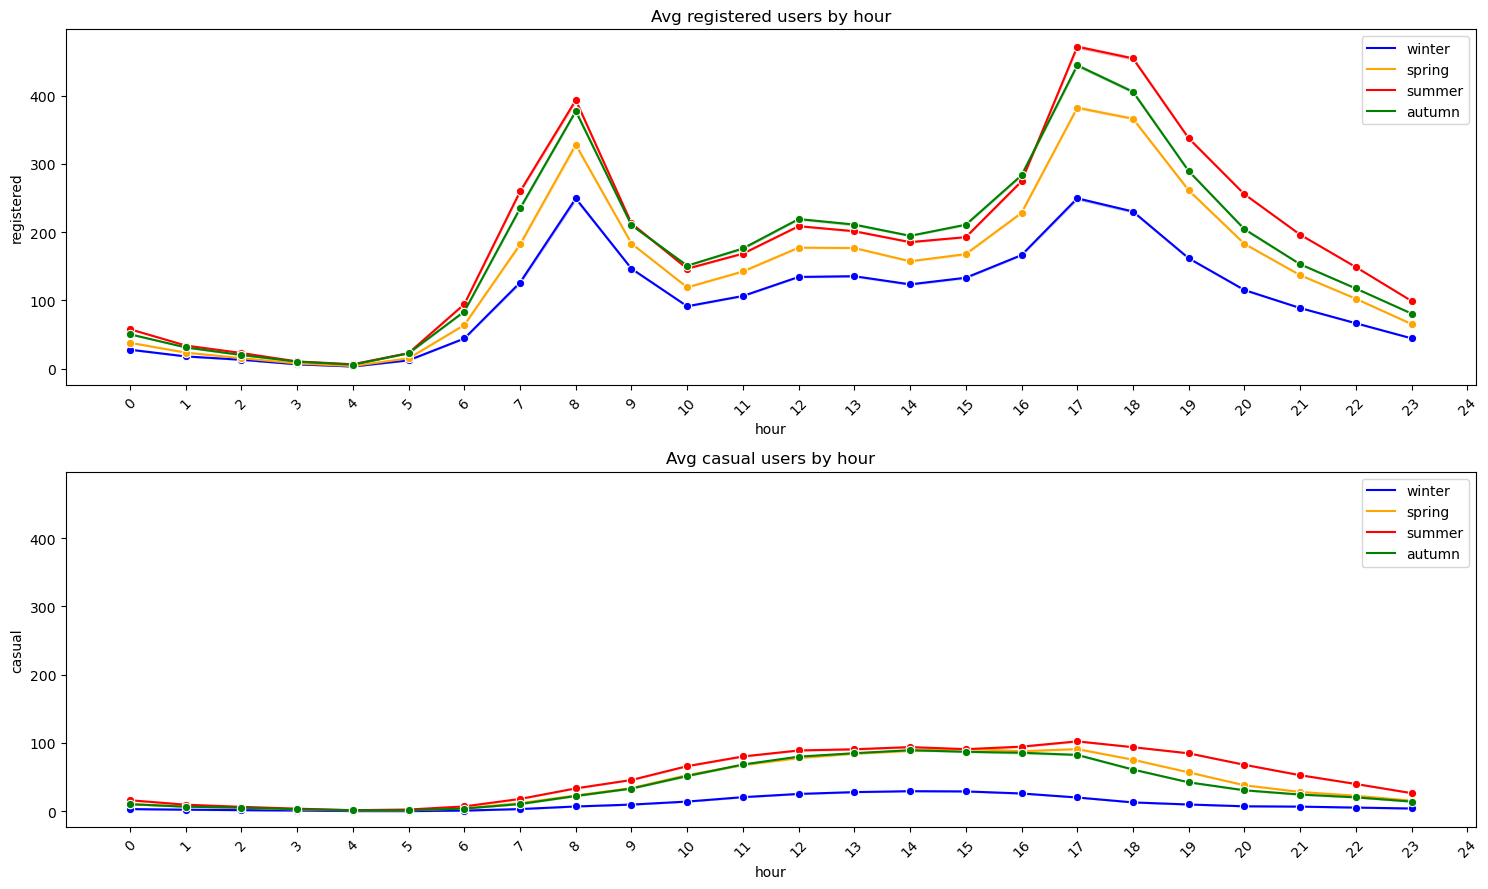

In [28]:
fig, axes = plt.subplots(2,1, figsize = (15, 9), sharey = True)
colors = ['blue', 'orange', 'red', 'green']
sns.set_palette(sns.color_palette(colors))

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'season', marker = 'o', ci = 10)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'season', marker = 'o', ci = 10)

axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1))


axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')

plt.tight_layout()
plt.show()

- In winter, the drop in rides is less severe for registered users than casual users. 
- For casual users, the number of users is quite consistent in spring, summer, autumn. 

<h4> 3.4) Casual vs registered users per hour, per apparent temperature category </h4>

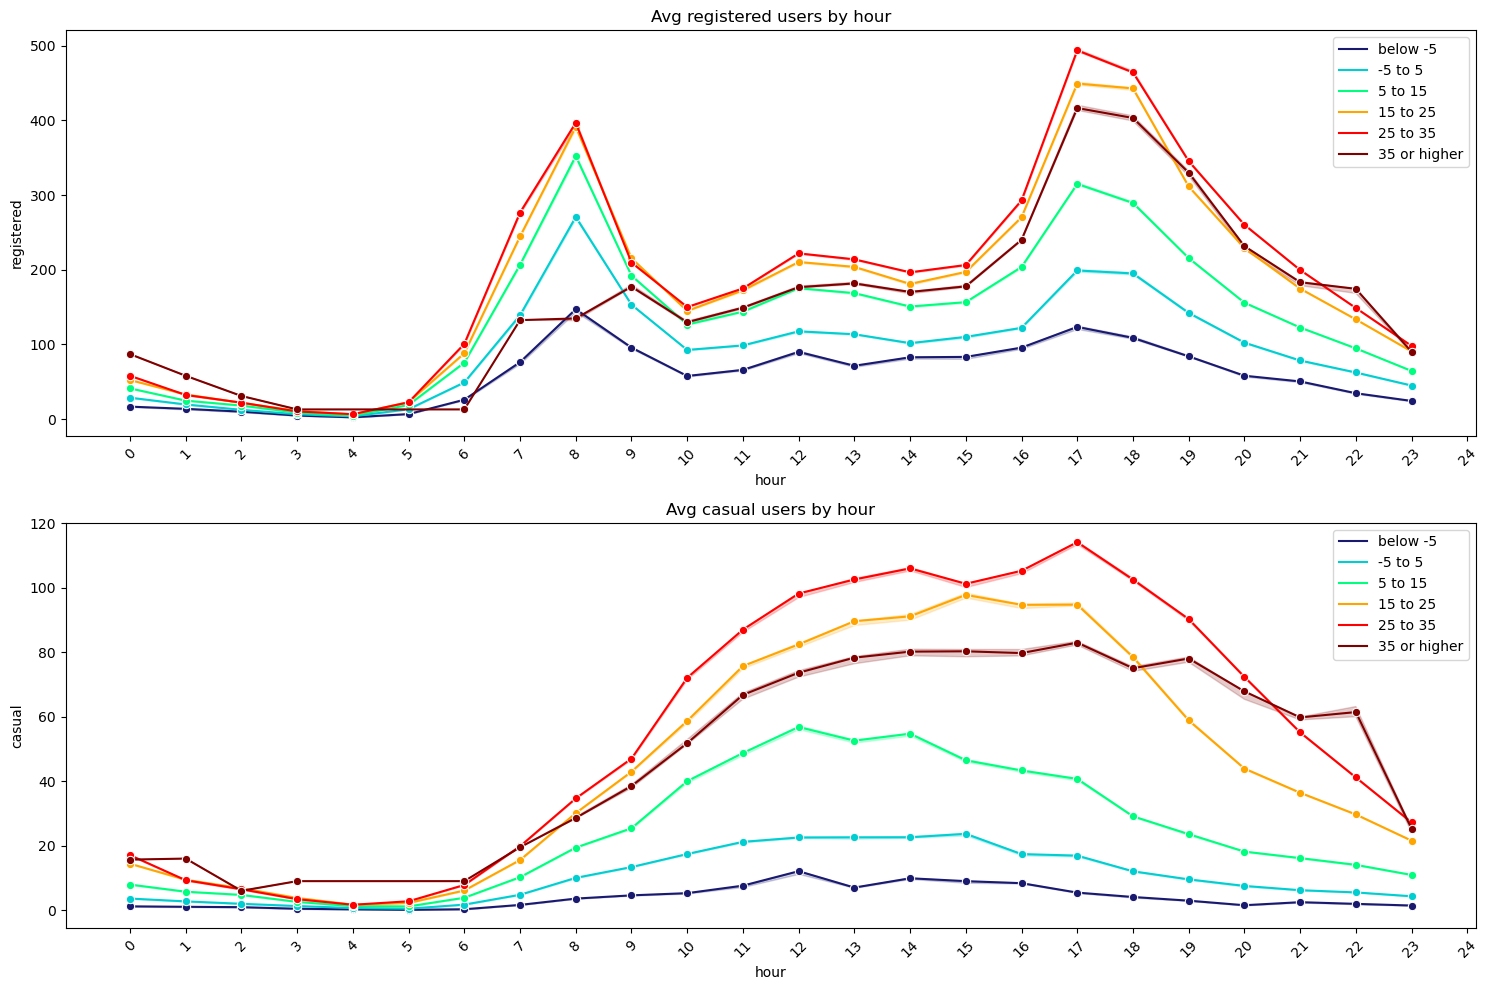

In [29]:
fig, axes = plt.subplots(2,1, figsize = (15, 10), sharey = False)

palette = {'below -5': "#191970", '-5 to 5': "#00CED1", '5 to 15': "#00FF7F",
           '15 to 25': "#FFA500", '25 to 35': "#FF0000", '35 or higher': "#800000"}

hue_order = ['below -5', '-5 to 5', '5 to 15', '15 to 25', '25 to 35', '35 or higher']

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'app_temp_cat', marker = 'o', ci = 10, palette = palette, hue_order = hue_order)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'app_temp_cat', marker = 'o', ci = 10, palette = palette, hue_order = hue_order)

axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1))

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))

axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')


plt.tight_layout()
plt.show()

- Among registered users, when app_temp is 35 or above, there is a sharp drop in rides TO work, but still a lot of rides FROM work. 
- Perhaps they don't want to get sweaty when they arrive at work, while they can simply take a shower in the evening when they get home. 
- But for (5 to 15), a large number of people bike TO work, but way fewer bike FROM work.

<h3> 4) Free day vs work day </h3>

<h4> 4.1) Total rides per hour, per type of day </h4>

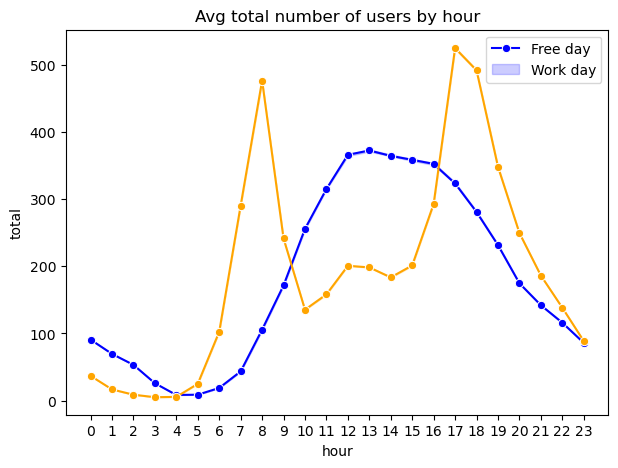

In [30]:
plt.figure(figsize = (7,5))
plt.title('Avg total number of users by hour')
lp = sns.lineplot(x = 'hour', y = 'total', hue = 'work_day', data = df_hourly, marker = 'o', ci = 10)
lp.legend(loc = 'upper right', bbox_to_anchor = (1,1))
lp.set_xticks(range(0,24))
lp.legend(labels = ['Free day', 'Work day'])
plt.show()

- Interesting. When it's a work day, usage peaks at around 8 AM. When it's not a work day, usage peaks at around noon.
- Of course, we know there are way more registered users, so this graph is likely influenced mostly by registered users.

<h4> 4.2) Registered vs casual users per hour, per type of day </h4>

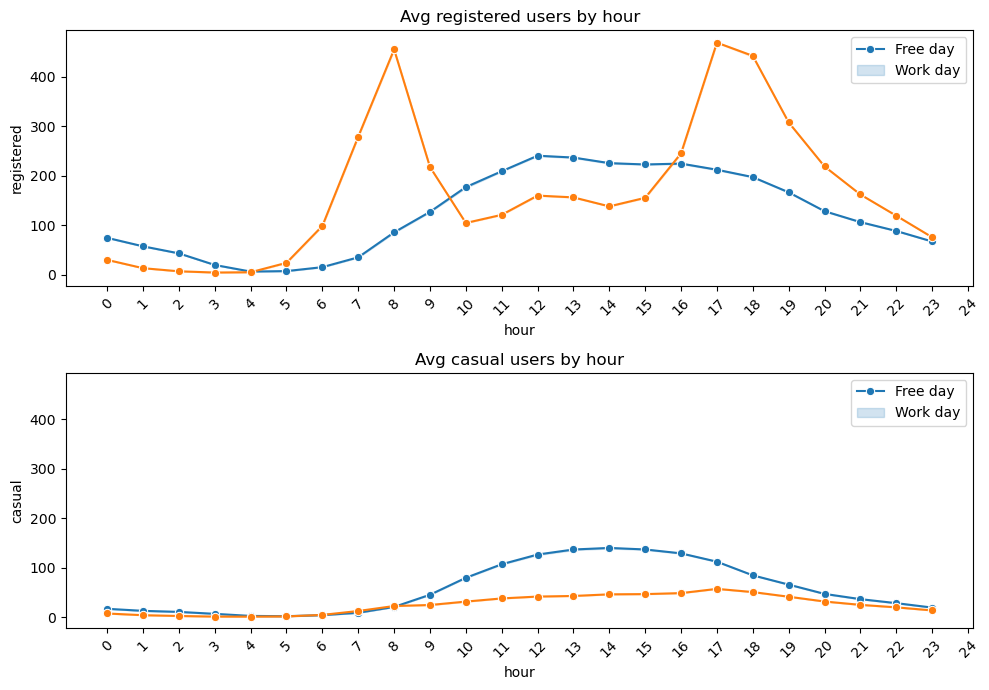

In [31]:
fig, axes = plt.subplots(2, 1, figsize = (10,7), sharey = True)

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'work_day', palette = 'tab10', marker = 'o', ci = 10)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'work_day', palette = 'tab10', marker = 'o', ci = 10)

axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1), labels = ['Free day', 'Work day'])
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1), labels = ['Free day', 'Work day'])

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))

axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')

plt.tight_layout()
plt.show()


* Registered users:
* Work days: sharper peaks during commuting times
* Free days: gentler, wider peak (from late morning to late afternoon)

* Casual users:
* Work day: lower peak at around 5 pm
* Free day: higher peak in the early afternoon

<h2> Part 2: Trend and Seasonality Analysis </h2>

<h3> 1) Load aggragated data for years 2010 – 2019 </h3>

In [32]:
df_all_agg_daily = pd.read_csv('cleaned_data/df_all_agg_daily.csv')
df_all_agg_hourly = pd.read_csv('cleaned_data/df_all_agg_hourly.csv')

In [33]:
df_all_agg_daily.head()

,date,registered,casual,year,month,day,year_month
0,2010-09-20,178,34,2010,9,Mon,2010-09
1,2010-09-21,215,109,2010,9,Tue,2010-09
2,2010-09-22,260,117,2010,9,Wed,2010-09
3,2010-09-23,249,124,2010,9,Thu,2010-09
4,2010-09-24,206,156,2010,9,Fri,2010-09


<h3> 2) Sum of users per month for years 2010 – 2019 </h3>

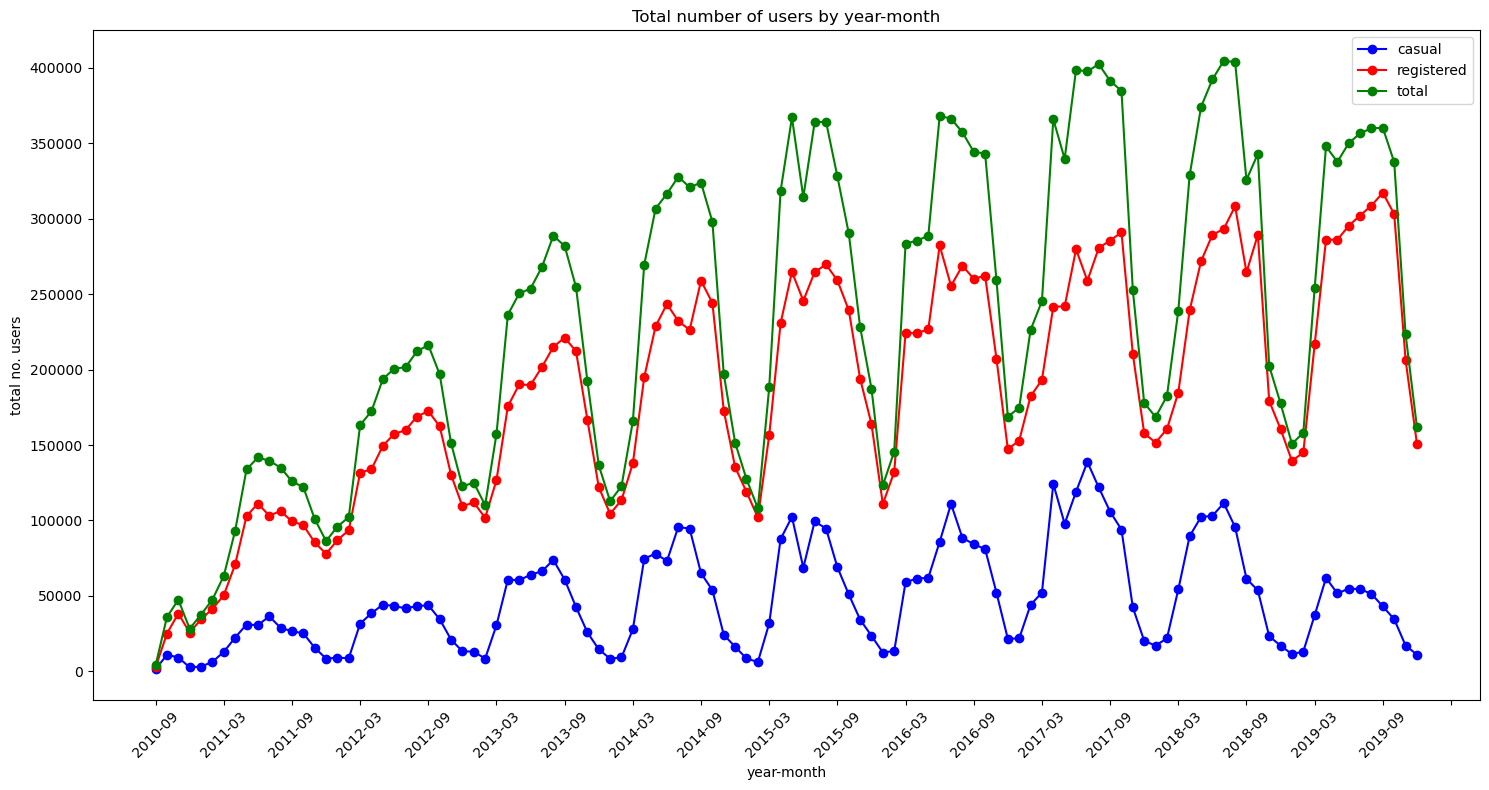

In [47]:
# group by "year_month" and sum over "registered" and "casual" users
df_by_month = df_all_agg_daily.groupby('year_month').sum()[['registered', 'casual']].reset_index()

# add "total" column
df_by_month['total'] = df_by_month['registered'] + df_by_month['casual']

fig, ax = plt.subplots(figsize = (15,8))
plt.title('Total number of users by year-month')

ax.plot(df_by_month['year_month'], df_by_month['casual'], label = 'casual', marker = 'o', color = 'blue')
ax.plot(df_by_month['year_month'], df_by_month['registered'], label = 'registered', marker = 'o', color = 'red')
ax.plot(df_by_month['year_month'], df_by_month['total'], label = 'total', marker = 'o', color = 'green')
#ax.xticks(ticks = df_by_month['year_month'], rotation = 90)
tick_spacing = 6
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.xticks(rotation=45)
plt.xlabel ('year-month')
plt.ylabel ('total no. users')
plt.legend()
plt.tight_layout()
plt.show()

* There's a steady growth in registered users, but little growth in casual users.

* Would be good to know: <br>
-- Of the new registered users, how many of them were previously casual users? <br>
-- Do people go from being non-users to registered users? Or do most new registered users come from being casual users first?

<h3> 3) Boxplots for total rides per month (seasonality) and per year (trend) </h3>

In [50]:
# Add "year" and "month" columns
df_by_month['year_month'] = pd.to_datetime(df_by_month['year_month']).dt.to_period('M')
df_by_month['year'] = df_by_month['year_month'].dt.year
df_by_month['month'] = df_by_month['year_month'].dt.strftime('%b')

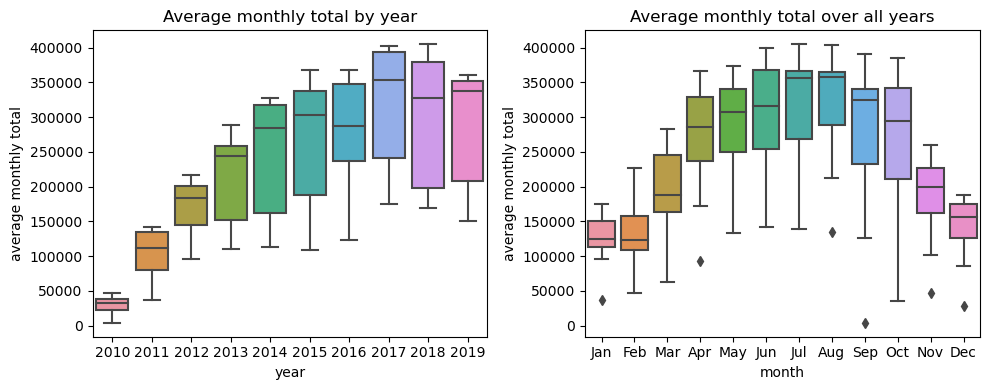

In [53]:
# 'year' plot shows: monthly average per year
# 'month' plot shows: monthly average over all years

fig, ax = plt.subplots(1,2, figsize = (10,4))

order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(ax = ax[0], x = 'year', y = 'total', data = df_by_month )
sns.boxplot(ax = ax[1], x = 'month', y = 'total', data = df_by_month, order = order )

ax[0].set_title('Average monthly total by year')
ax[1].set_title('Average monthly total over all years')

ax[0].set_ylabel('average monthly total')
ax[1].set_ylabel('average monthly total')
plt.tight_layout()
plt.show()

- We see a clear trend of growth until the year 2017, after which the growth plateaus
- There's also a clear seasonality, with higher number of rides in the warm months

<h3> 4) Compute rolling mean to show trend </h3>

In [56]:
# Convert date to datetime format
df_all_agg_daily['date'] = pd.to_datetime(df_all_agg_daily['date'])
df_all_agg_hourly['date'] = pd.to_datetime(df_all_agg_hourly['date'])

# Create dataframe with average daily users per month
df_all_monthly_mean = df_all_agg_daily [['date', 'registered', 'casual']].resample('M', on = 'date').mean()

# Create dataframe with average daily users per year (rolling mean)
df_all_rolling_365 = df_all_agg_daily [['date', 'registered', 'casual']].rolling(window = 365, on = 'date', center = True, min_periods = 365).mean()

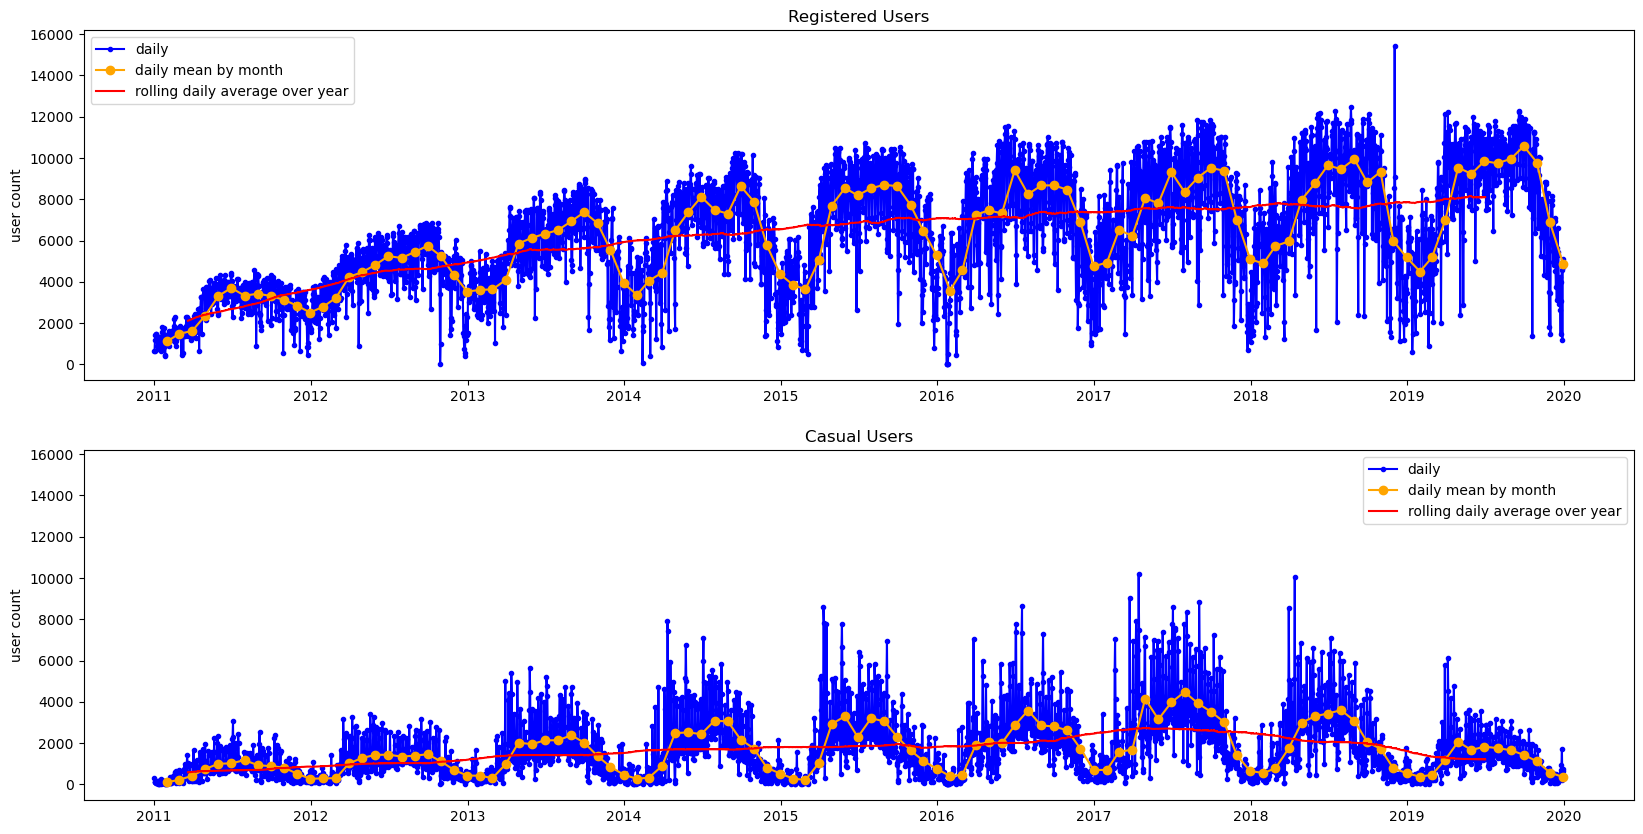

In [57]:
# Start and end of the date range to extract
start, end = '2011-01', '2019-12'

fig, ax = plt.subplots(2,1, figsize = (20,10), sharey = True)
ax[0].plot(df_all_agg_daily.set_index('date').loc[start:end, 'registered'], marker = '.', linestyle = '-', label = 'daily')
ax[0].plot(df_all_monthly_mean.loc[start:end, 'registered'], marker = 'o', linestyle = '-', label = 'daily mean by month')
ax[0].plot(df_all_rolling_365.set_index('date').loc[start:end, 'registered'], marker = ',', linestyle = '-', label = 'rolling daily average over year', c = 'r')

ax[0].set_title('Registered Users')
ax[0].set_ylabel('user count')
ax[0].legend()

ax[1].plot(df_all_agg_daily.set_index('date').loc[start:end, 'casual'], marker = '.', linestyle = '-', label = 'daily')
ax[1].plot(df_all_monthly_mean.loc[start:end, 'casual'], marker = 'o', linestyle = '-', label = 'daily mean by month')
ax[1].plot(df_all_rolling_365.set_index('date').loc[start:end, 'casual'], marker = ',', linestyle = '-', label = 'rolling daily average over year', c = 'r')

ax[1].set_title('Casual Users')
ax[1].set_ylabel('user count')
ax[1].legend()

plt.show()



<h3> 5) Rides by casual vs registered users: per year (trend) and per month (seasonality) </h3>

In [59]:
# Create dataframe with daily mean per year-month
df_all_daily_mean_per_month = df_all_agg_daily.groupby('year_month').mean()
df_all_daily_mean_per_month[['year','month']] = df_all_daily_mean_per_month[['year','month']].astype('int')

df_all_daily_mean_per_month.head()

,registered,casual,year,month
year_month,,,,
2010-09,245.818182,118.000000,2010,9
2010-10,806.193548,353.548387,2010,10
2010-11,1275.666667,303.900000,2010,11
2010-12,826.451613,84.709677,2010,12
2011-01,1110.903226,98.870968,2011,1


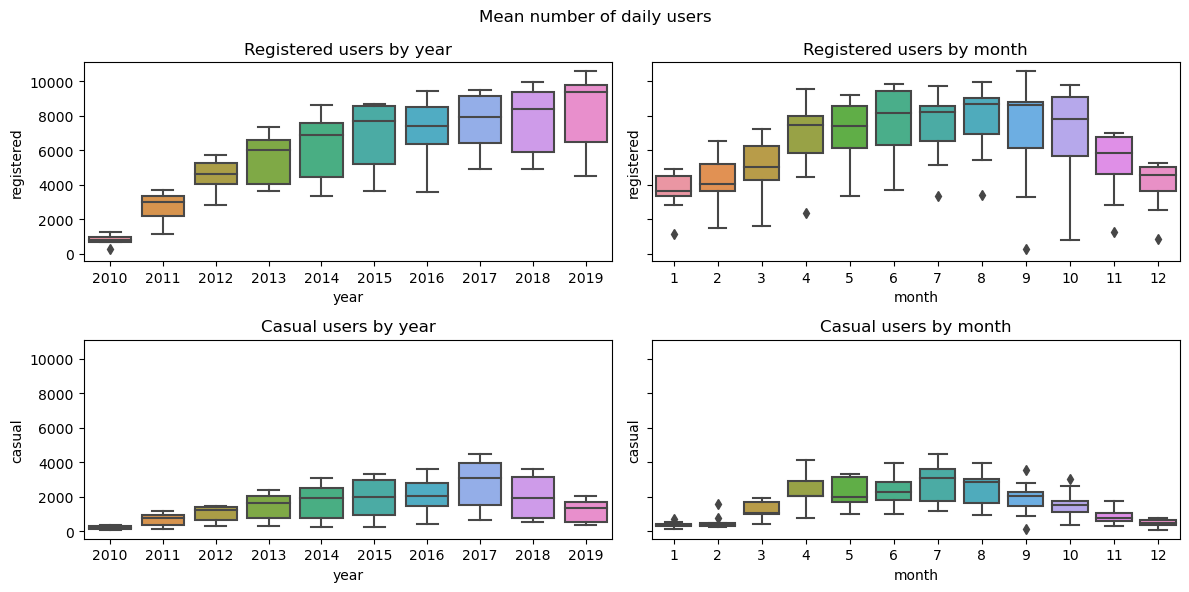

In [66]:
fig, axes = plt.subplots(2,2, figsize = (12,6), sharey = True)
fig.suptitle('Mean number of daily users')
sns.boxplot(ax = axes[0,0],x = 'year', y = 'registered', data = df_all_daily_mean_per_month)
axes[0,0].set_title('Registered users by year')
sns.boxplot(ax = axes[0,1],x = 'month', y = 'registered', data = df_all_daily_mean_per_month)
axes[0,1].set_title('Registered users by month')
sns.boxplot(ax = axes[1,0],x = 'year', y = 'casual', data = df_all_daily_mean_per_month )
axes[1,0].set_title('Casual users by year')
sns.boxplot(ax = axes[1,1],x = 'month', y = 'casual', data = df_all_daily_mean_per_month)
axes[1,1].set_title('Casual users by month')
plt.tight_layout()
plt.show()

- Number of rides by registered users shows stronger growth, though this plateaus after 2016
- Number of rides by casual users shows slower growth, and drops sharply after 2017
- Similar seasonality in both registered and casual users

<h3> 6) Trend vs seasonality using seasonal_decompose </h3>

<h4> 6.1) Multiplicative seasonality </h4>

In [70]:
df_all_daily_mean_per_month.index = pd.to_datetime(df_all_daily_mean_per_month.index)

#seasonal_decompose for multiplicative seasonality
registered_mult = seasonal_decompose(df_all_daily_mean_per_month['registered'], model='multiplicative', extrapolate_trend='freq')
casual_mult = seasonal_decompose(df_all_daily_mean_per_month['casual'], model='multiplicative', extrapolate_trend='freq')

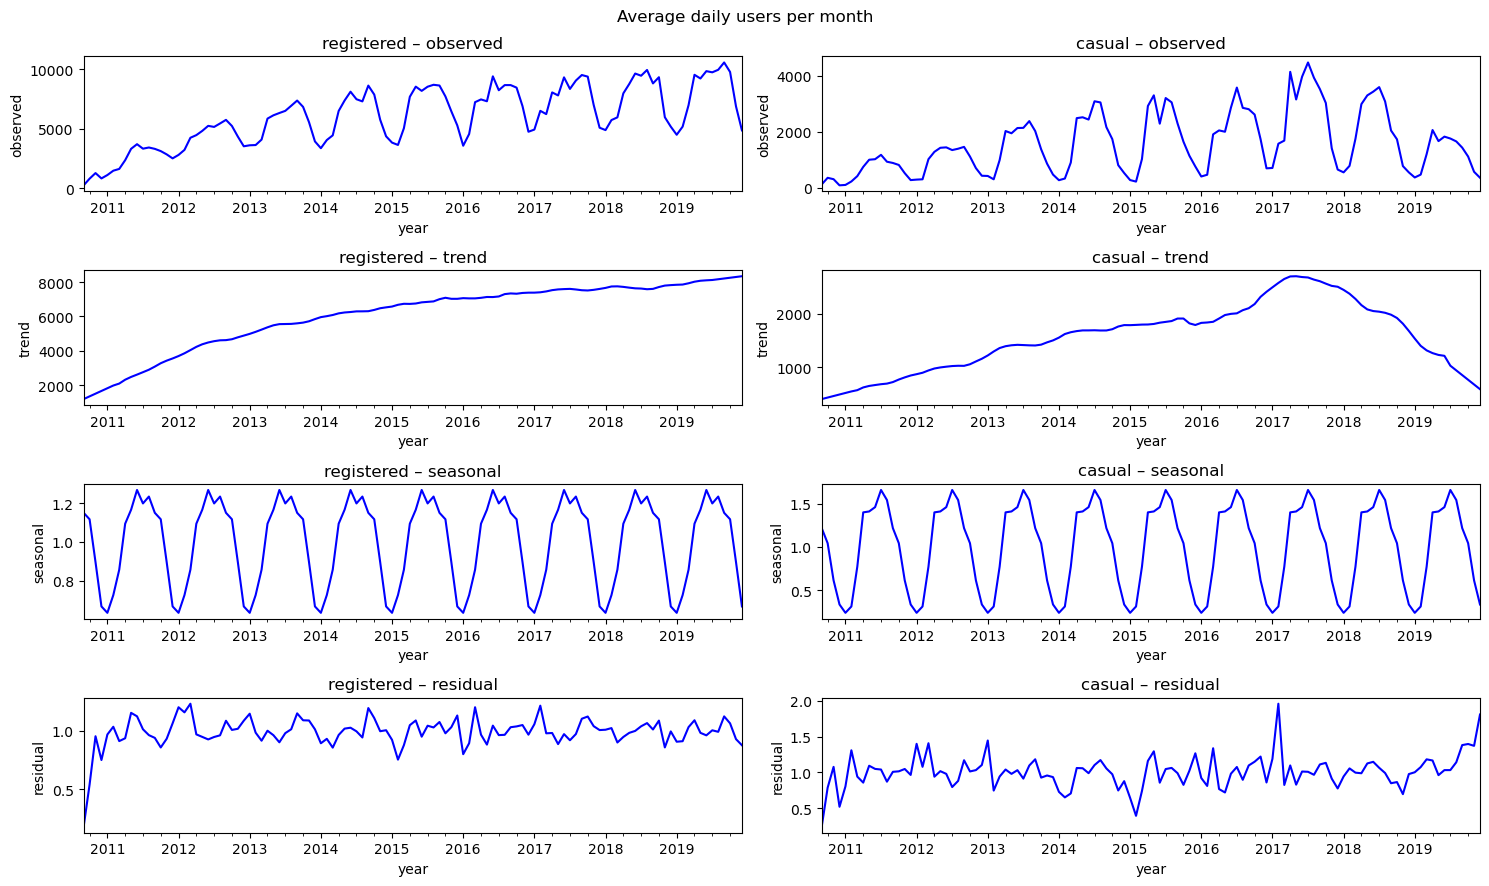

In [71]:
fig,ax = plt.subplots(4,2, figsize = (15,9))

fig.suptitle('Average daily users per month')

registered_mult.observed.plot(ax = ax[0][0], legend = False)
ax[0][0].set_xlabel('year')
ax[0][0].set_ylabel('observed')
ax[0][0].set_title('registered – observed')

registered_mult.trend.plot(ax = ax[1][0], legend = False)
ax[1][0].set_xlabel('year')
ax[1][0].set_ylabel('trend')
ax[1][0].set_title('registered – trend')

registered_mult.seasonal.plot(ax = ax[2][0], legend = False)
ax[2][0].set_xlabel('year')
ax[2][0].set_ylabel('seasonal')
ax[2][0].set_title('registered – seasonal')

registered_mult.resid.plot(ax = ax[3][0], legend = False)
ax[3][0].set_xlabel('year')
ax[3][0].set_ylabel('residual')
ax[3][0].set_title('registered – residual')


casual_mult.observed.plot(ax = ax[0][1], legend = False)
ax[0][1].set_xlabel('year')
ax[0][1].set_ylabel('observed')
ax[0][1].set_title('casual – observed')

casual_mult.trend.plot(ax = ax[1][1], legend = False)
ax[1][1].set_xlabel('year')
ax[1][1].set_ylabel('trend')
ax[1][1].set_title('casual – trend')

casual_mult.seasonal.plot(ax = ax[2][1], legend = False)
ax[2][1].set_xlabel('year')
ax[2][1].set_ylabel('seasonal')
ax[2][1].set_title('casual – seasonal')

casual_mult.resid.plot(ax = ax[3][1], legend = False)
ax[3][1].set_xlabel('year')
ax[3][1].set_ylabel('residual')
ax[3][1].set_title('casual – residual')

plt.tight_layout()
plt.show()


<h4> 6.2) Additive seasonality </h4>

In [73]:
# seasonal_decompose for additive seasonality
registered_add = seasonal_decompose(df_all_daily_mean_per_month['registered'], model='additive', extrapolate_trend='freq')
casual_add = seasonal_decompose(df_all_daily_mean_per_month['casual'], model='additive', extrapolate_trend='freq')

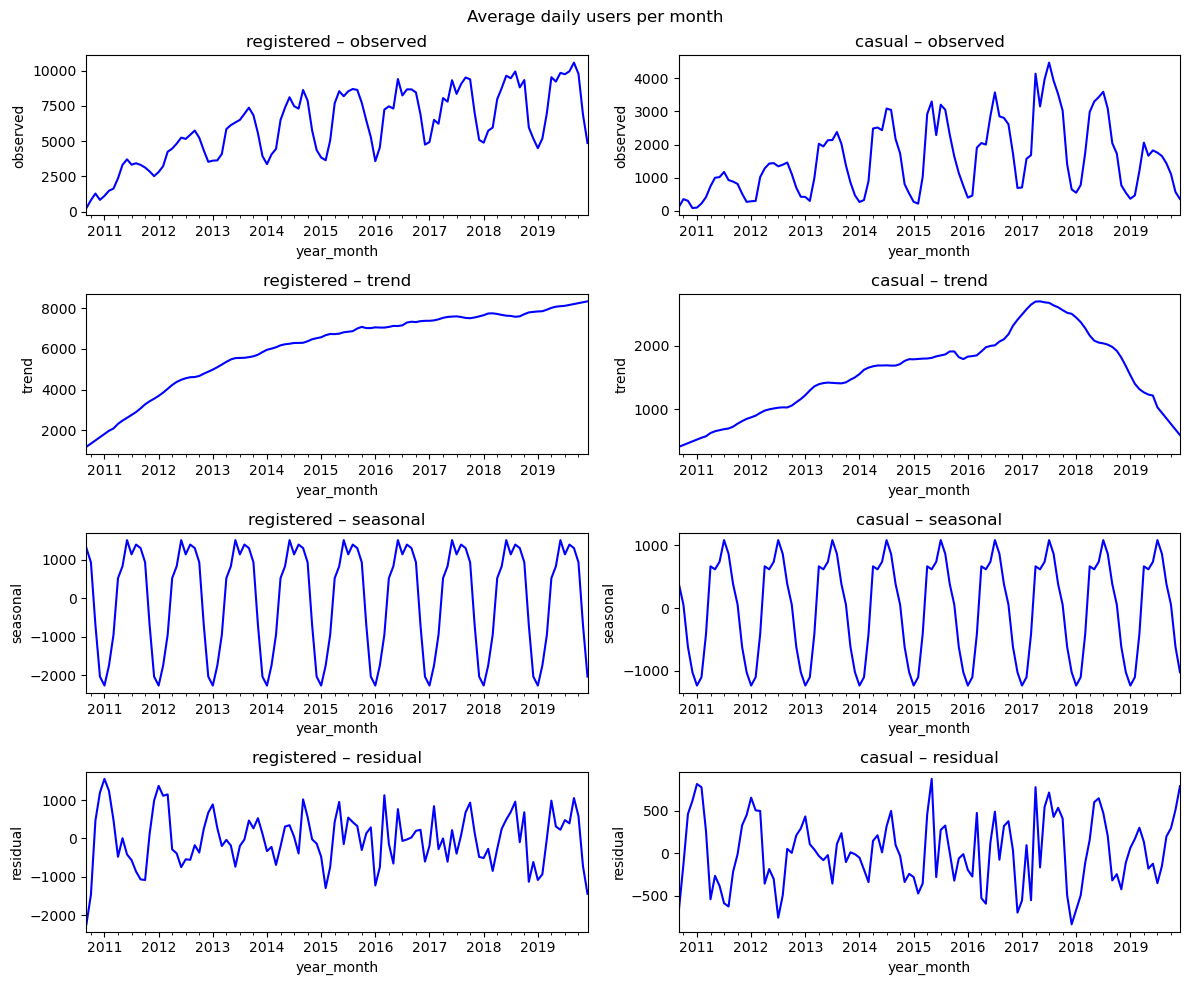

In [77]:
fig,ax = plt.subplots(4,2, figsize = (12,10))

fig.suptitle('Average daily users per month')

registered_add.observed.plot(ax = ax[0][0], legend = False)
ax[0][0].set_ylabel('observed')
ax[0][0].set_title('registered – observed')

registered_add.trend.plot(ax = ax[1][0], legend = False)
ax[1][0].set_ylabel('trend')
ax[1][0].set_title('registered – trend')

registered_add.seasonal.plot(ax = ax[2][0], legend = False)
ax[2][0].set_ylabel('seasonal')
ax[2][0].set_title('registered – seasonal')

registered_add.resid.plot(ax = ax[3][0], legend = False)
ax[3][0].set_ylabel('residual')
ax[3][0].set_title('registered – residual')

casual_add.observed.plot(ax = ax[0][1], legend = False)
ax[0][1].set_ylabel('observed')
ax[0][1].set_title('casual – observed')

casual_add.trend.plot(ax = ax[1][1], legend = False)
ax[1][1].set_ylabel('trend')
ax[1][1].set_title('casual – trend')

casual_add.seasonal.plot(ax = ax[2][1], legend = False)
ax[2][1].set_ylabel('seasonal')
ax[2][1].set_title('casual – seasonal')

casual_add.resid.plot(ax = ax[3][1], legend = False)
ax[3][1].set_ylabel('residual')
ax[3][1].set_title('casual – residual')

plt.tight_layout()
plt.show()


<h3> 7) Year-on-year growth for registered vs casual users </h3>

In [79]:
# Create new dataframe to track sum of registered and casual users per year
annual_growth = df_all_daily_mean_per_month.groupby('year').sum()[['registered', 'casual']]

# Create new columns for annual growth (registered and casual)
annual_growth['annual_growth_reg'] = np.zeros((len(annual_growth),1))
annual_growth['annual_growth_cas'] = np.zeros((len(annual_growth),1))
annual_growth = annual_growth.reset_index()

# Compute annual growth rate
for i in range(2, len(annual_growth)):
    
    annual_growth.loc[i, 'annual_growth_reg'] = 100* ((annual_growth.loc[i, 'registered'] / annual_growth.loc[i-1, 'registered']) - 1)
    annual_growth.loc[i, 'annual_growth_cas'] = 100*((annual_growth.loc[i, 'casual'] / annual_growth.loc[i-1, 'casual']) - 1)

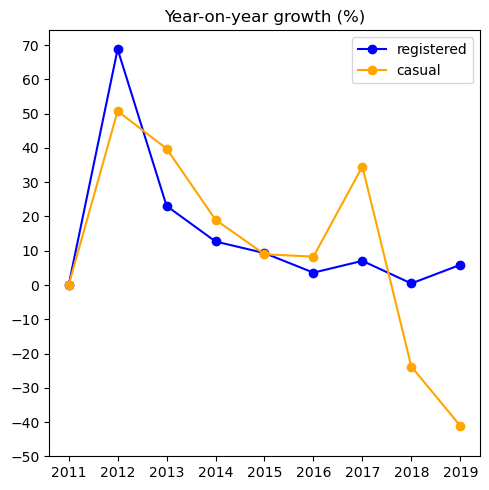

In [81]:
fig, ax = plt.subplots( figsize = (5,5))
ax.set_title('Year-on-year growth (%)')
ax.plot(annual_growth.loc[1:,'year'], annual_growth.loc[1:, 'annual_growth_reg'], marker = 'o', label = 'registered')
ax.plot(annual_growth.loc[1:, 'year'], annual_growth.loc[1:,'annual_growth_cas'], marker = 'o', label = 'casual')

ax.set_yticks(list(range(-50, 71, 10)))
ax.set_xticks(list(range(2011,2020,1)))
plt.legend()

plt.tight_layout()
plt.show()